In [31]:
import time

In [32]:
def getFile(filename):
    f = open(filename, 'r')    
    line = f.readline()
    arrays = []
    while line:
        arrays.append([int(i) for i in line[1:-2].split(',')])  #CONVERT A STRING TO INTEGER
        line = f.readline()   #READ ELEMENT LINE BY LINE
    f.close()
    return arrays

In [33]:
def saveFile(filename, arrays):
    file1 = open(filename,"w") 
    for arr in arrays:
        line = str(arr)+'\n'
        file1.writelines(line) 
    file1.close() #to change file access modes

In [34]:
import random

def generate_array(length):
    generated_array = []
    for i in range(0,length):
        generated_array.append(random.randint(0,length))
    return generated_array

In [35]:
#creating a array of size 5,10 15..... 1000
length_array = []
i=0
input_size = int(input("enter the size of a array: "))
while i<=input_size:
    i+=5
    length_array.append(i)
#     print(length_array)
    

random_arrays = []
asc_arrays = []
des_arrays = []
for i in length_array:
    random_arrays.append(generate_array(i))   #STORE RANDOM NUMBER
    asc_arrays.append(sorted(generate_array(i)))    #STORE NUMBER IN ASCENDING ORDER
    des_arrays.append(sorted(generate_array(i), reverse=True))        #STORE NUMBER IN DESCENDING ORDER
    
saveFile('ascending_file.txt', asc_arrays)
saveFile('descending_file.txt', des_arrays)
saveFile('rand_file.txt', random_arrays)

enter the size of a array: 300


In [36]:
def merge_sort(genearted_list):
    length_generated_list = len(genearted_list)
    
    if(length_generated_list <= 1):
        return genearted_list
    
    else:
        left_child = genearted_list[0:length_generated_list//2]
        right_child = genearted_list[length_generated_list//2:length_generated_list]
        
        merge_sort(left_child)      #divide as long as there is only 1 element in the sub array
        merge_sort(right_child)
        
        return merge(left_child,right_child,genearted_list) 

In [37]:
def merge(left_child,right_child,genearted_list):
    i = j = k = 0
    
#     merge_list = [0 for _ in range(len(left_child)+len(right_child))]
    while i<len(left_child) and j<len(right_child):
        
        if left_child[i] > right_child[j]:
            genearted_list[k] = right_child[j]
            j = j+1
        
        else:
            genearted_list[k] = left_child[i]
            i = i+1
        k = k+1
        
        
        #remaining elements
    while i<len(left_child):
        genearted_list[k] = left_child[i]
        i = i+1
        k = k+1
        
    while j<len(right_child):
        genearted_list[k] = right_child[j]
        j = j+1
        k = k+1
        
    return genearted_list

In [38]:
if __name__ == '__main__':
    merge_des_lists = getFile('descending_file.txt')
    merge_asc_lists = getFile('ascending_file.txt')
    merge_random_lists = getFile('rand_file.txt')
    
    total_asc_merge_time = []
    total_des_merge_time = []
    total_ran_merge_time = []
    
    sorted_des_merge_list = []
    sorted_asc_merge_list = []
    sorted_ran_merge_list = []
     
    
    for genearted_list in merge_des_lists:
        
        merge_desc_start_time = time.time()
        sorted_des_merge_list.append(merge_sort(genearted_list))
        merge_desc_end_time = time.time()
        
        merge_des_run_time = merge_desc_end_time-merge_desc_start_time
        
        total_des_merge_time.append(merge_des_run_time)
        
    for genearted_list in merge_asc_lists:
        
        merge_asc_start_time = time.time()
        sorted_asc_merge_list.append(merge_sort(genearted_list))
        merge_asc_end_time = time.time()
        
        merge_asc_run_time = merge_asc_end_time-merge_asc_start_time
        
        total_asc_merge_time.append(merge_asc_run_time)
        
        
    for genearted_list in merge_random_lists:
        
        merge_ran_start_time = time.time()
        sorted_ran_merge_list.append(merge_sort(genearted_list))
        merge_ran_end_time = time.time()
        
        merge_ran_run_time = merge_ran_end_time-merge_ran_start_time
        
        total_ran_merge_time.append(merge_ran_run_time)
    
    print("creating a merge_sort file which sorted the descending order number: \n")    
    saveFile('merge_descending_file.txt',sorted_des_merge_list)
    print("creating a merge_sort file which sorted the ascending order number: \n") 
    saveFile('merge_ascending_file.txt',sorted_asc_merge_list)
    print("creating a merge_sort file which sorted the random number: \n") 
    saveFile('merge_random_file.txt',sorted_ran_merge_list)
    

creating a merge_sort file which sorted the descending order number: 

creating a merge_sort file which sorted the ascending order number: 

creating a merge_sort file which sorted the random number: 



In [39]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

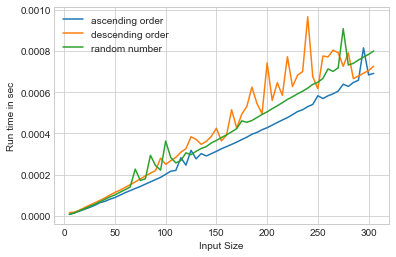

<Figure size 432x288 with 0 Axes>

In [40]:
plt.xlabel('Input Size')
plt.ylabel('Run time in sec')
fig = plt.gcf()
plt.plot(length_array,total_asc_merge_time);
plt.plot(length_array,total_des_merge_time)
plt.plot(length_array,total_ran_merge_time)
plt.legend(['ascending order','descending order','random number'], loc='upper left')
plt.show()
plt.draw()
fig.savefig('MERGE.png',dpi = 200)